# K-평균 알고리즘

* 군집 중심점(centroid)이라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법.

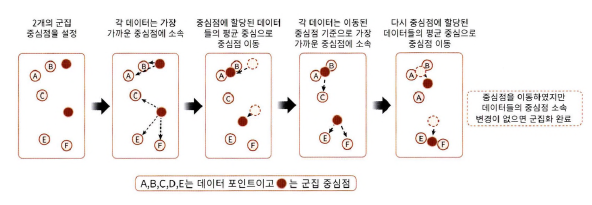

1. 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의로 정함.
2. 각 데이터는 가장 가까운 곳에 위치한 중신점에 속함.
3. 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 중심으로 이동.
4. 기존에 속한 중심점보다 더 가까운 중심점이 있다면 해당 중심점으로 다시 소속 변경
5. 다시 소속된 데이터의 평균 중심으로 이동
6. 데이터의 중심점 소속 변경이 없으면 군집화를 종료. 그렇지 않으면 다시 위 프로세스 반복.

### K-평균 장점
* 일반벅인 군집화에서 가장 많이 활용되는 알고리즘
* 알고리즘이 쉽고 간결하다

### K-평균 단점
* 거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어진다. => 이를 위해 PCA로 차원 감소를 적용해야 할 수도 있다.
* 반복을 수행하는데, 반복 횟수가 많을 경우 수행 시간이 매우 느려진다.
* 몇 개의 군집(cluster)을 선택해야 할지 가이드가 어렵다.

### 사이킷런 KMeans 클래스

* 사이킷런의 K-평균을 구현하기 위한 KMeans 클래스.

    class sklearn.cluster.KMeans(n_clsters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

**중요 파라미터**
* n_clsters : 군집화할 개수(군집 중심점의 개수)
* init : 초기에 군집 중심점의 좌표를 설정하는 방식. 일반적으로 k-means++ 방식으로 최초 설정한다.
* max_iter : 최대 반복 횟수, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료.

**속성**
* labels_ : 각 데이터 포인트가 속한 군집 중심점 레이블.
* cluster_centers_ : 각 군집 중심점 좌표([군집 개수, 피처 개수]). 군집 중심점 시각화 가능.

In [1]:
# K-평균을 이용한 붓꽃 데이터 세트 군집화
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개 그룹으로 군집화.

In [2]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [3]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

labels_의 값이 0, 1, 2로 돼있으며, 이는 각 레코드가 첫 번째 군집, 두 번째 군집, 세 번째 군집에 속함을 의미한다.

In [4]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

분류 target이 0인 데이터는 1번 군집으로 모두 그루핑되었고, target 1 데이터는 2개를 제외하고 모두 그루핑이 되었다. 마지막 target 2같은 경우 0번에 14개 2번에 36개로 분산되어 그루핑되었다.



In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


pca_x는 X 좌표값, pca_y는 Y좌표값이다.

각 군집별로 cluster 0은 마커 'o', cluster 1은 마커 's', cluster 2는 마커 '^'로 표현

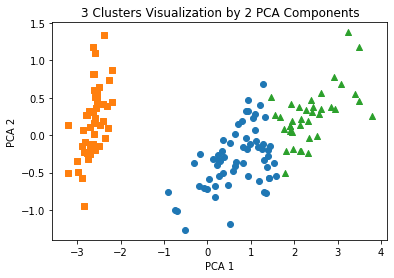

In [6]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값이 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

동그라미와 세모는 네모만큼 명확하게 구분이 되지는 않는다.

# 군집화 알고리즘을 위한 데이터 생성 : make_blobs(), make_classification()

### make_blobs() 
* 개별 군집의 중심점과 표준 편차 제어 기능이 추가되어 있음
* 파라미터
    * n_samples : 생성할 총 데이터 개수. default = 100.
    * n_features : 데이터의 피처 개수. 시각화가 목표 -> 2개로 설정하여 x, y 좌표
    * centers : int로 설정 -> 군집의 개수, ndarray로 설정 -> 개별 군집 중심점의 좌표 의미.
    * clster_std : 생성될 군집 데이터의 표준 편차를 의미(0.8이면 데이터 표준편차가 0.8. [0.8, 1.2, 0.6]이면 첫 번째 군집 내 데이터 표준 편차 = 0.8, 두번째는 1.2, 세번째는 0.6이 된다).




In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

# 총 200개의 레코드와 2개의 피처가 3개의 군집화 기반 분포도를 가진 피처 데이터 세트 X와, 
# 동시에 3개의 군집화 값을 가진 다깃 데이터 세트 y가 반환된다.
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
unique, counts

(200, 2) (200,)


(array([0, 1, 2]), array([67, 67, 66]))

피처 데이터 세트 X는 200개의 레코드와 2개의 피처를 가지므로 shape는 (200, 2), 군집 타깃 데이터 세트인 y의 shape(200,), 그리고 3개의 cluster의 값은 [0, 1, 2]이며 각각 67, 67, 66개로 균일하게 구성돼있다. 

In [8]:
import pandas as pd
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


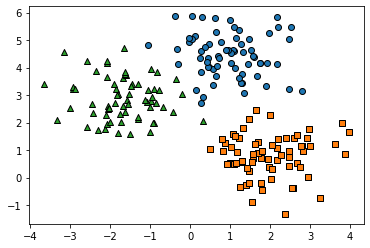

In [9]:
# make_blob()로 만든 데이터 세트 시각화
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'x']
# 3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2로 scatter plot을 marker별로 생성
for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

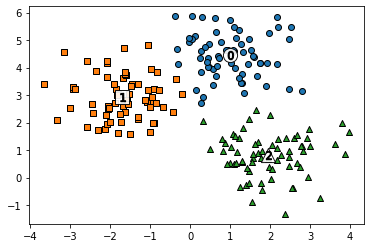

In [10]:
# make_blob()로 만든 데이터 세트에 KMeans 군집화 수행 후 시각화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'P','D','H','x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별로 중심 위치 좌표 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
plt.show()

make_blobs()의 타깃과 kmeans_label은 군집 번호를 의미하므로 서로 다른 값으로 매핑될 수 있다.

In [11]:
clusterDF.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64

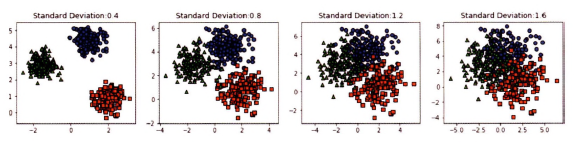

### make_classification() 
* 노이즈를 포함한 데이터를 만드는데 유용.




### 이 외 
* make_circle(), make_mmon() = > 중심 기반의 군집화로 해결하기 어려운 데이터 세트를 만드는데 사용.